# Análise de Dados da Eleição de 2020 dos Estados Unidos
_Dados adquiridos de Kaggle.com_

O que iremos ver aqui é apenas a quantidade total de votos por estado nos EUA.

In [16]:
# Importação das bibliotecas necessárias para a análise:
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt
from numpy import median

In [3]:
base = pd.read_csv('./data/president_county.csv')
base.head()

,state,county,current_votes,total_votes,percent
0,Delaware,Kent County,87025,88000,95
1,Delaware,New Castle County,287633,293878,95
2,Delaware,Sussex County,129352,125000,95
3,District of Columbia,District of Columbia,37762,45392,83
4,District of Columbia,Ward 2,29382,37140,79


Aqui vemos que os dados estão separados em Munincipios

In [4]:
base.shape

(4633, 5)

In [5]:
# Pegar os val
base['state'].value_counts().head()

Maine            498
Massachusetts    351
Texas            254
Vermont          246
New Hampshire    237
Name: state, dtype: int64

Aqui separamos os estados e somamos os valores totais de votos.

In [6]:
total_per_state = base.groupby(['state'], sort=False)['total_votes'].transform('sum')
base['total_state'] = total_per_state
base.head()

,state,county,current_votes,total_votes,percent,total_state
0,Delaware,Kent County,87025,88000,95,506878
1,Delaware,New Castle County,287633,293878,95,506878
2,Delaware,Sussex County,129352,125000,95,506878
3,District of Columbia,District of Columbia,37762,45392,83,348619
4,District of Columbia,Ward 2,29382,37140,79,348619


In [7]:
new_base = base.drop(["county", "current_votes", 'total_votes', "percent"], axis=1)
new_base = new_base.drop_duplicates(subset=['state'])
new_base.head()

,state,total_state
0,Delaware,506878
3,District of Columbia,348619
11,Florida,11321757
78,Georgia,4992124
237,Hawaii,551047


In [8]:
new_base.shape

(51, 2)

In [9]:
us_states = new_base.state
us_total_per_state = new_base.total_state

[Text(0, 0.5, ''), Text(0.5, 0, 'Total de Votos Por Milhão')]

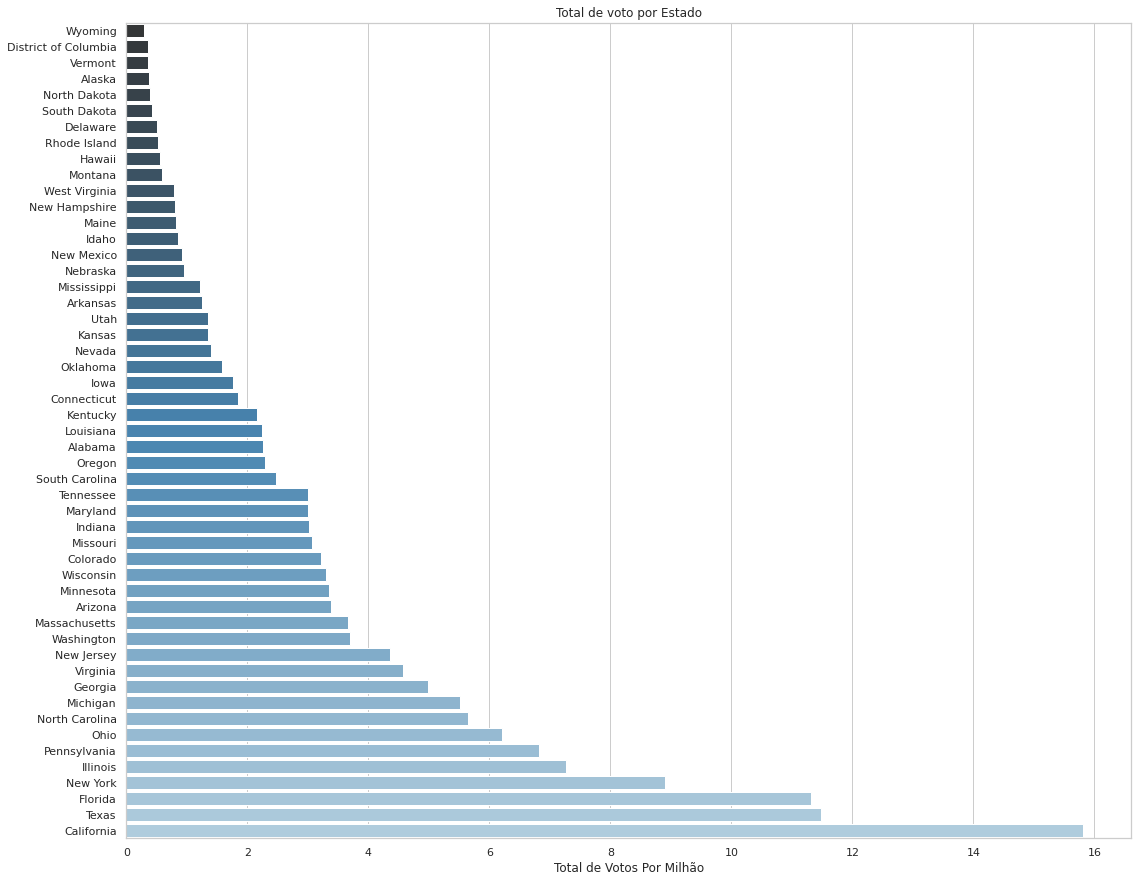

In [24]:
# Muda tanto no MatPlotLib como no Seaborn 
toPlot = new_base.sort_values('total_state', ascending=True)

srn.set(style="whitegrid")

fig = plt.subplots(figsize=(18, 15))

plt.title('Total de voto por Estado')
ax = srn.barplot(x=toPlot.total_state.map(lambda x: x/1000000), y=toPlot.state, palette='Blues_d')
ax.set(xlabel='Total de Votos Por Milhão', ylabel='')

In [11]:
# fig, ax = plt.subplots(figsize=(18, 15))
# plt.title('Total de voto por Estado')
# plt.barh(toPlot.state[::-1], toPlot.total_state[::-1], align='center')